In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f1a927846a95cba6ec3a681582d652eb850d95c81e7f5218a4cf65e6dfa5d69c
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [6]:
pip skfuzzy

ERROR: unknown command "skfuzzy"


156.7902682918963


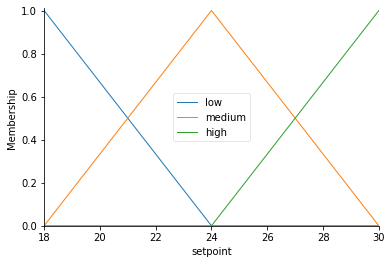

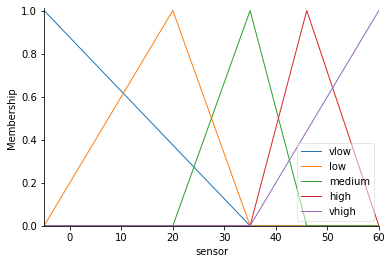

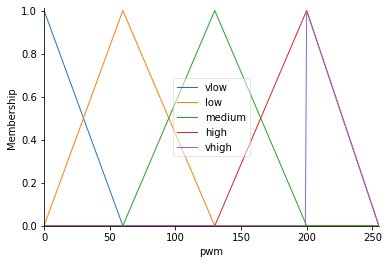

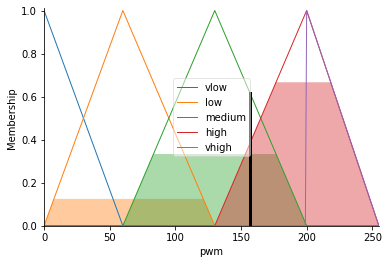

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
setpoint=ctrl.Antecedent(np.arange(18,31,1),'setpoint')
sensor=ctrl.Antecedent(np.arange(-5,61,1),'sensor')
pwm=ctrl.Consequent(np.arange(0,256,1),'pwm')


setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['high']=fuzz.trimf(setpoint.universe,[24,30,30])


sensor['vlow']=fuzz.trimf(sensor.universe,[-5,-5,35])
sensor['low']=fuzz.trimf(sensor.universe,[-5,20,35])
sensor['medium']=fuzz.trimf(sensor.universe,[20,35,46])
sensor['high']=fuzz.trimf(sensor.universe,[35,46,60])
sensor['vhigh']=fuzz.trimf(sensor.universe,[35,60,60])

pwm['vlow']=fuzz.trimf(pwm.universe,[0,0,60])
pwm['low']=fuzz.trimf(pwm.universe,[0,60,130])
pwm['medium']=fuzz.trimf(pwm.universe,[60,130,200])
pwm['high']=fuzz.trimf(pwm.universe,[130,200,255])
pwm['vhigh']=fuzz.trimf(pwm.universe,[200,200,255])
setpoint.view()
sensor.view()
pwm.view()


rule1=ctrl.Rule(setpoint['low'] & sensor['vlow'], pwm['vlow'])
rule2=ctrl.Rule(setpoint['low'] & sensor['low'], pwm['low'])
rule3=ctrl.Rule(setpoint['low'] & sensor['medium'], pwm['medium'])
rule4=ctrl.Rule(setpoint['low'] & sensor['high'], pwm['medium'])
rule5=ctrl.Rule(setpoint['low'] & sensor['vhigh'], pwm['high'])

rule6=ctrl.Rule(setpoint['medium'] & sensor['vlow'], pwm['low'])
rule7=ctrl.Rule(setpoint['medium'] & sensor['low'], pwm['medium'])
rule8=ctrl.Rule(setpoint['medium'] & sensor['medium'], pwm['medium'])
rule9=ctrl.Rule(setpoint['medium'] & sensor['high'], pwm['high'])
rule10=ctrl.Rule(setpoint['high'] & sensor['vhigh'], pwm['vhigh'])


rule11=ctrl.Rule(setpoint['high'] & sensor['vlow'], pwm['low'])
rule12=ctrl.Rule(setpoint['high'] & sensor['low'], pwm['medium'])
rule13=ctrl.Rule(setpoint['high'] & sensor['medium'], pwm['high'])
rule14=ctrl.Rule(setpoint['high'] & sensor['high'], pwm['high'])
rule15=ctrl.Rule(setpoint['high'] & sensor['vhigh'], pwm['vhigh'])


cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['setpoint'] = 30
cpower.input['sensor'] = 30
cpower.compute()
print(cpower.output['pwm'])
pwm.view(sim = cpower)